The Gallup World Poll (GWP) is conducted annually to measure and track public attitudes concerning political, social and economic issues, including controversial and sensitive subjects. Annually, this poll tracks attitudes toward law and order, institutions and infrastructure, jobs, well-being and other topics for approximately 150 countries worldwide. The data gathered from the GWP is used to create an annual World Happiness Report (WHR). The World Happiness Report is conducted to review the science of understanding and measuring the subjective well-being and to use survey measures of life satisfaction to track the quality of lives in over 150 countries.

The dataset contains the Happiness Score for over 150 countries for the year of 2020. The data gathered from the Gallup World Poll gives a national average of Happiness scores for countries all over the world. It is an annual landmark survey of the state of global happiness.
https://www.kaggle.com/datasets/mathurinache/world-happiness-report?select=2020.csv

In [1]:
# imports
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# loading into a dataframe
df = pd.read_csv('/content/drive/MyDrive/datasets/World Happiness report 2020.csv')
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [4]:
# remove columns that we dont need
df.drop(df.columns[[3,4, 5, 12, 13, 14, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Regional indicator            153 non-null    object 
 2   Ladder score                  153 non-null    float64
 3   Logged GDP per capita         153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


In [6]:
# there are no Nan values
df.isna().values.any()

False

Ladder score:
min = 2.56690,
max = 7.80870,
mean = 5.47324

In [7]:
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


# Visualization

<Axes: xlabel='Ladder score', ylabel='Regional indicator'>

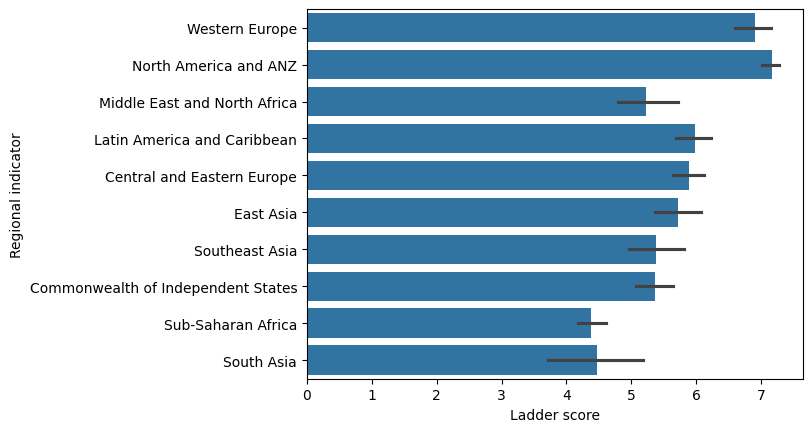

In [51]:
sns.barplot(y='Regional indicator', x='Ladder score', data=df)

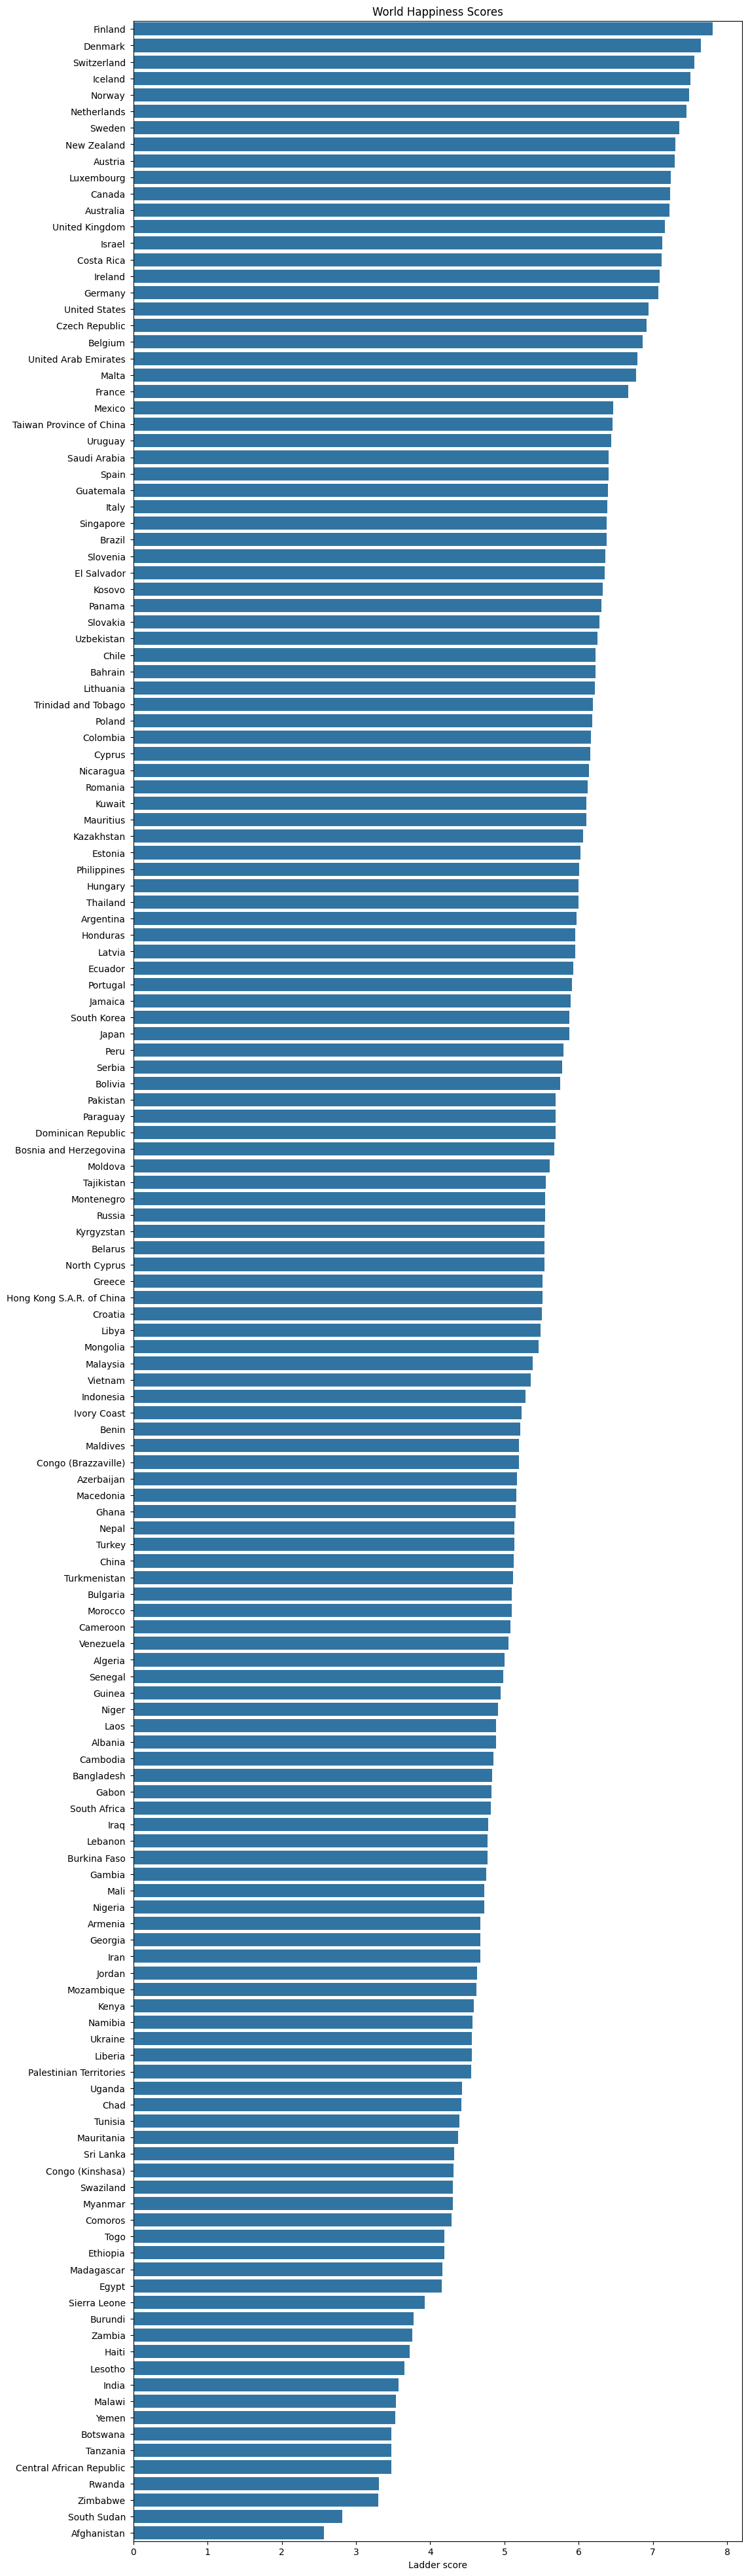

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 50))
sns.barplot(y='Country name', x='Ladder score', data=df)

plt.title('World Happiness Scores')
plt.ylabel('')

plt.gca().yaxis.set_tick_params(pad=5)  # הוספת רווח בין שמות המדינות

plt.show()


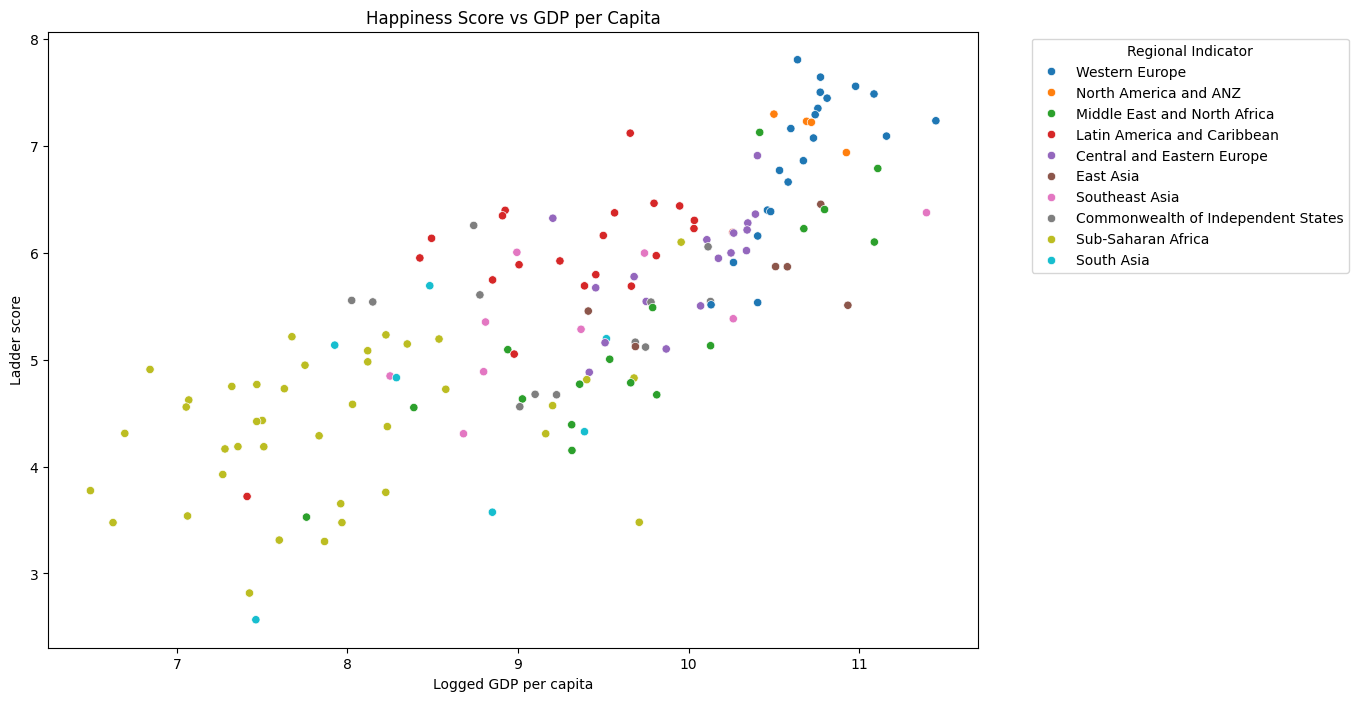

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # הגדלת גודל הגרף
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', hue='Regional indicator', data=df)

plt.title('Happiness Score vs GDP per Capita')

# הזזת המקרא מחוץ לתחום הגרף
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


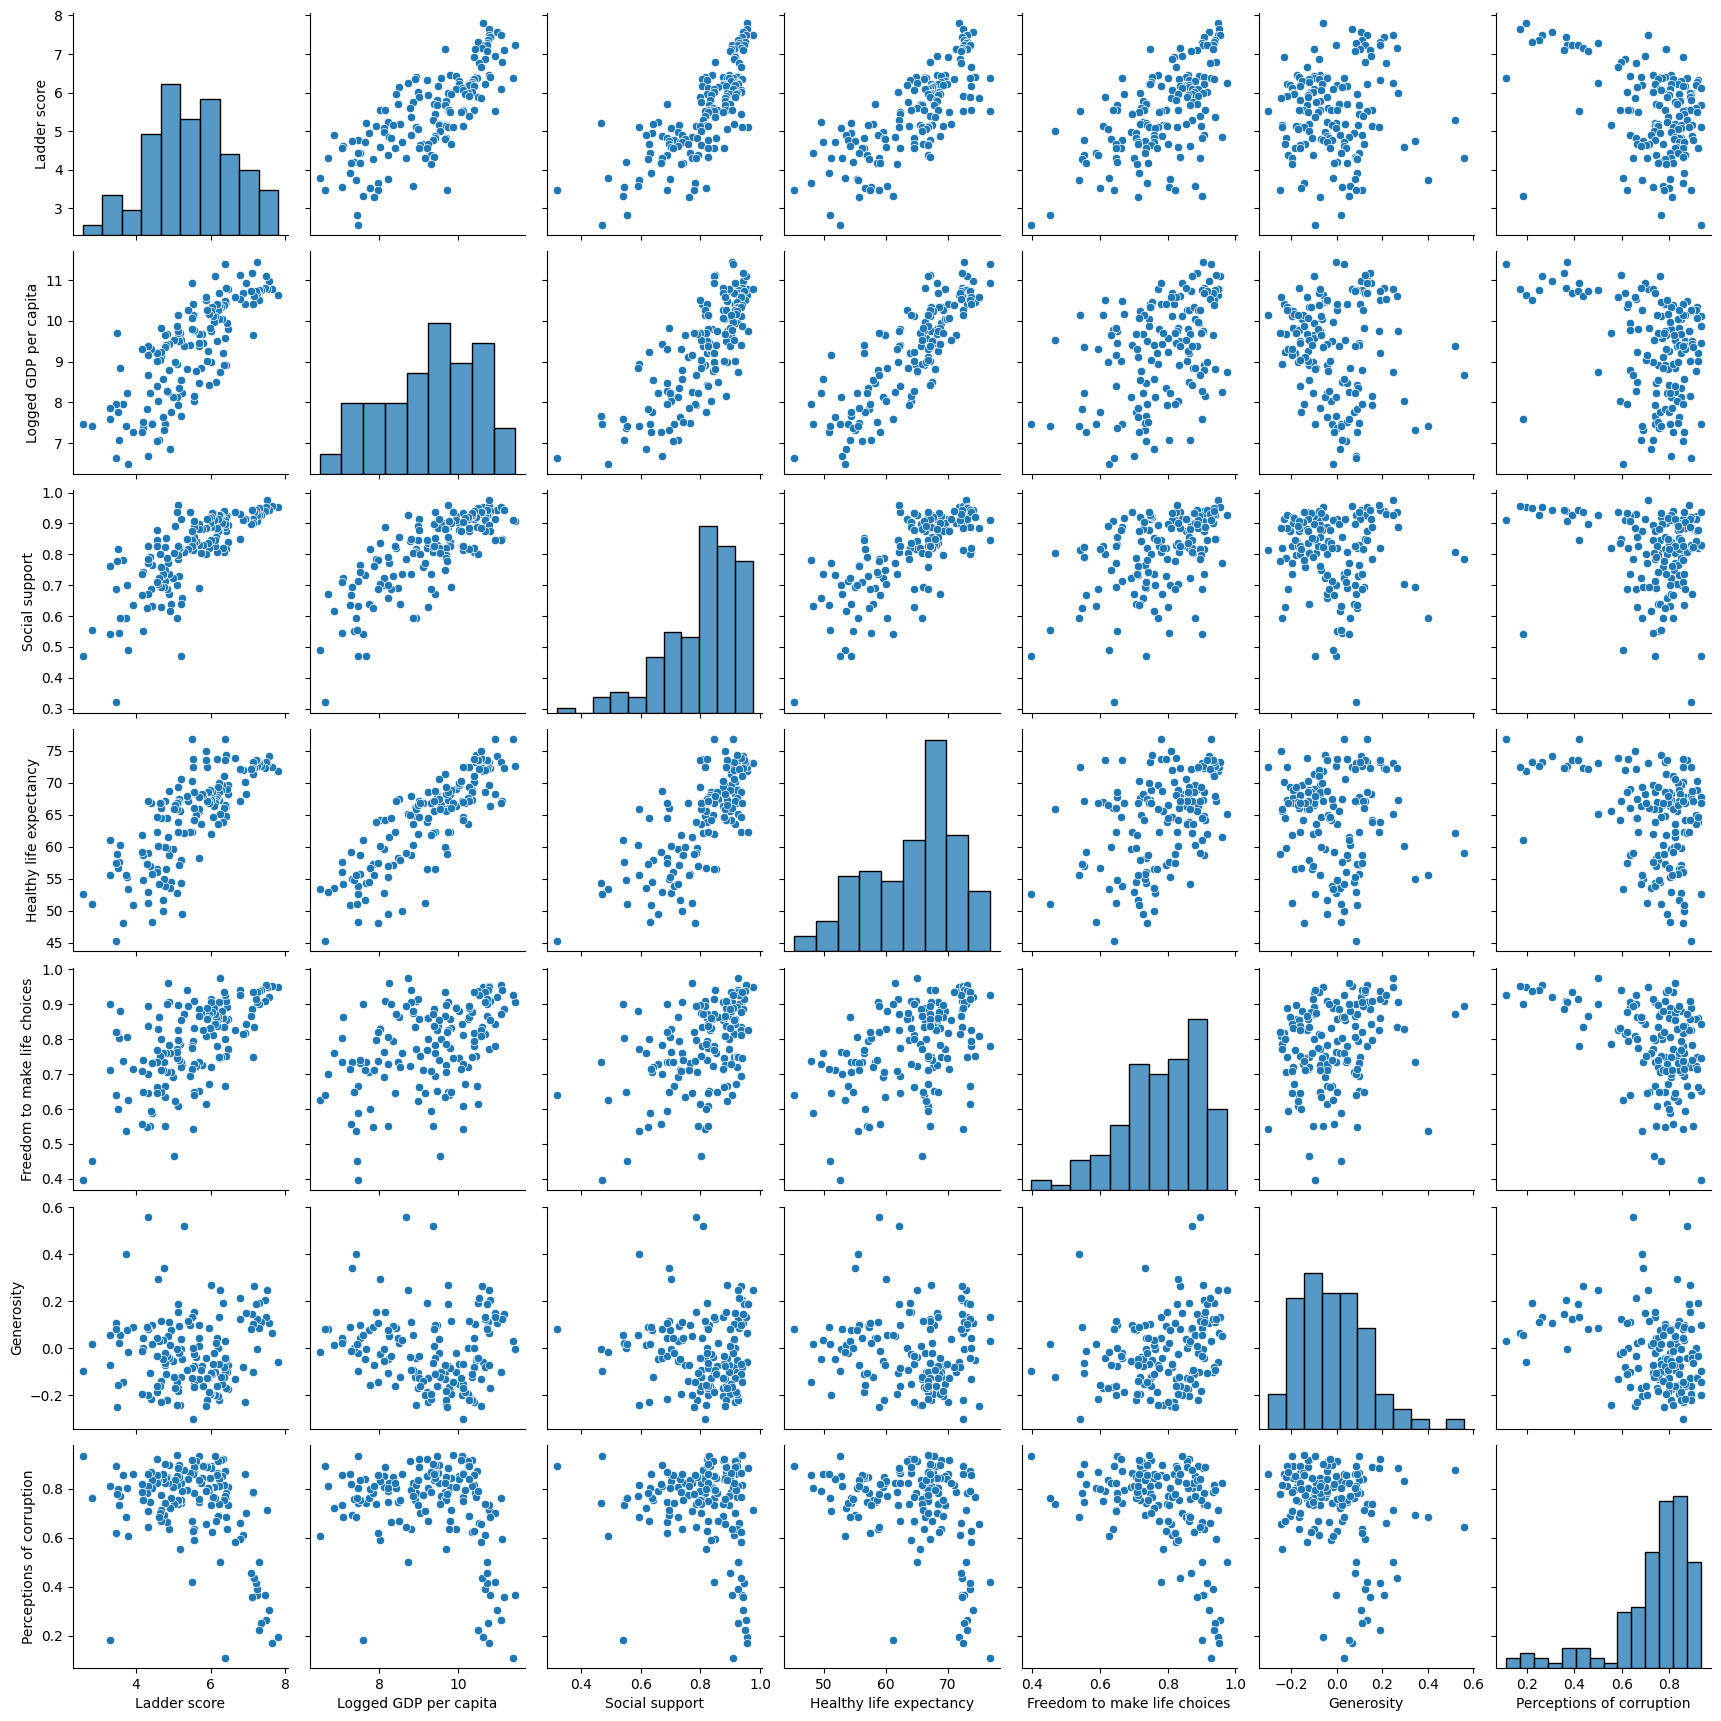

In [54]:
sns.pairplot(df)
# preception of corruption has a negetive linear releation with ladder score

# Correlations

In [55]:
 # Using  correlation to find out what features contribute most to predicting our target
df_corr = df[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

correlation = df_corr.corr()
correlation

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305
Logged GDP per capita,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729
Social support,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530
Healthy life expectancy,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841
Freedom to make life choices,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145
Generosity,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480
Perceptions of corruption,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000


In [56]:
 abs(correlation['Ladder score'].sort_values(ascending=False))

,Ladder score
Ladder score,1.000000
Logged GDP per capita,0.775374
Healthy life expectancy,0.770316
Social support,0.765001
Freedom to make life choices,0.590597
Generosity,0.069043
Perceptions of corruption,0.418305


Finland has the highest ladder score. You can compare the Logged GDP per capita, Healthy life expectancy and Social support values to max and mean df params value

In [57]:
df.sort_values(by=['Ladder score'], ascending=False)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


<Axes: >

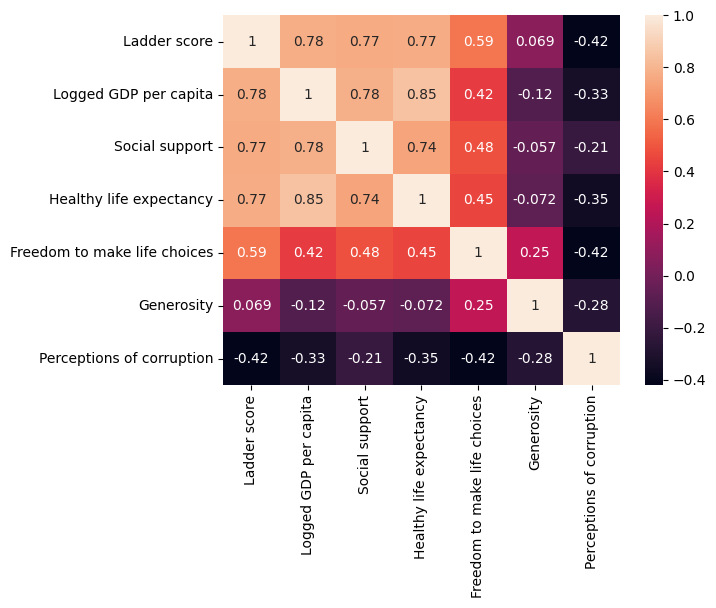

In [58]:
sns.heatmap(correlation, annot=True)

# Model prediction and evaluation

In [15]:
 #imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [17]:
 # defining the target variable vs other features that contribute
feature_vars = df
target_var = df['Ladder score']

In [44]:
 # dropping irrelevant features
feature_vars = feature_vars.drop(columns=['Ladder score','Country name', 'Regional indicator'], axis = 1, errors='ignore')
feature_vars



,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,10.639267,0.954330,71.900825,0.949172,0.195445
1,10.774001,0.955991,72.402504,0.951444,0.168489
2,10.979933,0.942847,74.102448,0.921337,0.303728
3,10.772559,0.974670,73.000000,0.948892,0.711710
4,11.087804,0.952487,73.200783,0.955750,0.263218
...,...,...,...,...,...
148,6.625160,0.319460,45.200001,0.640881,0.891807
149,7.600104,0.540835,61.098846,0.900589,0.183541
150,7.865712,0.763093,55.617260,0.711458,0.810237
151,7.425360,0.553707,51.000000,0.451314,0.763417


Fitting the Model

I fit the model with 75% training data which means 25% held out test data.

In [48]:
 X_train,X_test, y_train,y_test = train_test_split(feature_vars, target_var, train_size=.75)

lm = linear_model.LinearRegression()

# train the model
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = lm.predict(X_test)

Computing the R² score for linear regression

The coefficient of determination or R² represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

With all the features we get a R² score (coefficient of determination) of 0.7495367577946677. This means that ~73% of the data points fall on the regression line and ~73% of the independent/predictor variables in this model explain all the variation in y (Happiness Scores).

In [50]:
r2_score(y_test, y_pred)

0.8387298742708665

coefficients

In [35]:
 lm.coef_, lm.intercept_

(array([ 0.23049111,  3.13968718,  0.03246222,  1.34797106,  0.71301261,
        -0.55465306]),
 -1.9054886365093617)

The linear model is:

Happiness Score = 3.199Social Support + 0.053Healthy Life Expectancy + 1.695Freedom to Make Life Choices +0.199Generosity — 1.179*Perceptions of Corruption — 1.024.

The coefficients tell us the relationship between the Happiness Scores and the other features. When Happiness Score increases by one Social support increases by 3.199, Healthy Life Expectancy increases by 0.053, Freedom to Make Life Choices increases by 1.695, Generosity increases by 0.199 and Perceptions of Corruption decreases by 1.179.

In [36]:
 feature_vars.columns

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

MSE

Mean squared error (MSE) measures the amount of error in a model, looking at the average squared difference between the observed and predicted values. The lower the MSE value there more accurate the model is.

By calculating MSE we are getting the average length of all the residuals to capture the error in this model.

The MSE is 0.34. In other words, the average squared difference between the observed and predicted values is 0.34. The closer to 0 MSE is the better.

The predictors aren’t perfect but it is a pretty good fit, given that ~73% of the independent/predictor variables in this model explain all the variation in y and the amount of error in a model isn’t extreme.

Therefore, the model fits the data well.

In [37]:
 mean_squared_error(y_test,y_pred)

0.2885888870613092

Using the Prediction Model

In 2021 Finland scored a Happiness Score of 7.842. For Social support the received 0.954, Healthy life expectancy 72 and Freedom to make life choices 0.949.

Let’s see how our model performs for one year in the future.

The linear model is:

Happiness Score = 3.199Social Support + 0.053Healthy Life Expectancy + 1.695Freedom to Make Life Choices +0.199Generosity — 1.179*Perceptions of Corruption — 1.024.

In [38]:
 3.199*0.954 + 0.053*72 + 1.695*0.949 + 0.199*0 - 1.179*0 - 1.024

7.452400999999999

This makes sense since my model was not 100% perfect. However, it is fairly close to the actual value. The error is:

In [39]:
 7.842-7.452

0.3899999999999997